# Exp on GNN Kernels Results Visualization

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from utils import *

pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
os.makedirs(image_path, exist_ok=True)
df = pd.read_csv(os.path.join(root_path, 'wandb_export.csv'))
df.head()

,Name,model,dataset,bn,aggr,conv_layers,save_name,num_layers,hidden,best_test_acc,best_test_f1,best_val_acc,best_val_f1
0,CiteSeer_graphsage_256_3_3_max,graphsage,CiteSeer,False,max,3,CiteSeer_graphsage_256_3_3_max,3,256,0.751,0.674215,0.746,0.693434
1,CiteSeer_graphsage_256_3_3_mean,graphsage,CiteSeer,False,mean,3,CiteSeer_graphsage_256_3_3_mean,3,256,0.765,0.730048,0.782,0.730524
2,CiteSeer_graphsage_256_3_3_add,graphsage,CiteSeer,False,add,3,CiteSeer_graphsage_256_3_3_add,3,256,0.746,0.691765,0.742,0.690053
3,CiteSeer_graphsage_256_3_3_max_bn,graphsage,CiteSeer,True,max,3,CiteSeer_graphsage_256_3_3_max_bn,3,256,0.715,0.684928,0.716,0.679441
4,CiteSeer_graphsage_256_3_3_mean_bn,graphsage,CiteSeer,True,mean,3,CiteSeer_graphsage_256_3_3_mean_bn,3,256,0.709,0.681747,0.716,0.679500


## RQ1: How does the number of convolutional layers affect performance?

In [3]:
rq1 = df[df['model'] == 'gcn']
rq1['conv_layers'] = rq1['conv_layers'].apply(str)
rq1_bn = rq1[rq1['bn']==True].reset_index()[['dataset', 'conv_layers', 'best_test_acc', 'best_test_f1']]
rq1_no_bn = rq1[rq1['bn']==False].reset_index()[['dataset', 'conv_layers', 'best_test_acc', 'best_test_f1']]

Text(0.5, 1.0, 'Average Test Accuracy ~ #Conv Layers | Dataset')

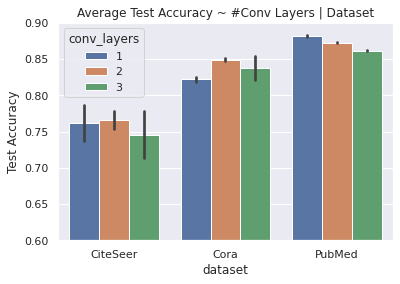

In [4]:
sns.barplot(data=rq1, x='dataset', y='best_test_acc', hue='conv_layers')
plt.ylabel('Test Accuracy')
plt.ylim(0.6, 0.9)
plt.title('Average Test Accuracy ~ #Conv Layers | Dataset')

(0.6, 0.9)

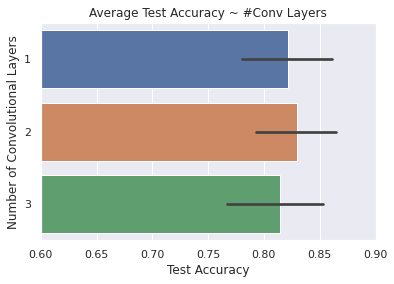

In [5]:
ax = sns.barplot(data=rq1, x='best_test_acc', y='conv_layers')
plt.xlabel('Test Accuracy')
plt.ylabel('Number of Convolutional Layers')
plt.title('Average Test Accuracy ~ #Conv Layers')
plt.xlim(0.6, 0.9)

## RQ2: How does Batch Normalization affect performance?
Consider Loss Curve here.

Text(0.5, 1.0, 'Average Test Accuracy ~ BN | Model')

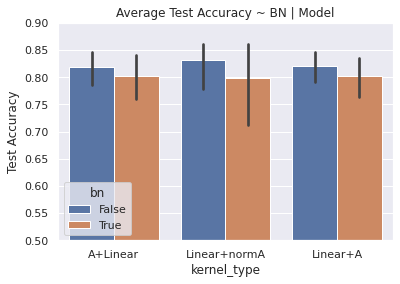

In [6]:
rq2 = df[df['conv_layers']==3]
def __map_model(x):
    if x == 'graphsage': return 'A+Linear'
    elif x == 'gcn': return 'Linear+normA'
    elif x == 'gcn_nonorm': return 'Linear+A'
rq2['kernel_type'] = rq2['model'].apply(__map_model)

sns.barplot(data=rq2, x='kernel_type', y='best_test_acc', hue='bn')
plt.ylim(0.5, 0.9)
plt.ylabel('Test Accuracy')
plt.title('Average Test Accuracy ~ BN | Model')

Text(0.5, 1.0, 'Average Test Accuracy ~ BN | Dataset')

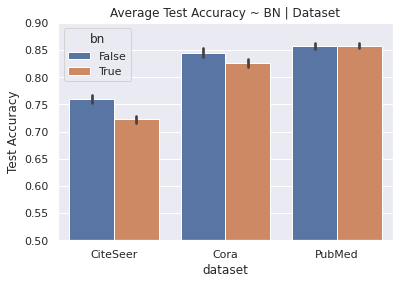

In [7]:
sns.barplot(data=rq2, x='dataset', y='best_test_acc', hue='bn')
plt.ylim(0.5, 0.9)
plt.ylabel('Test Accuracy')
plt.title('Average Test Accuracy ~ BN | Dataset')

Text(0.5, 1.0, 'Average Test Accuracy ~ BN | Aggregation')

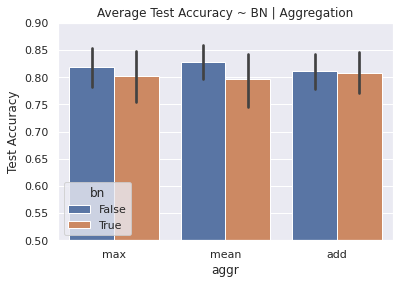

In [8]:
rq2_2 = rq2[(rq2['model']=='graphsage') | (rq2['model']=='gcn_nonorm')]
sns.barplot(data=rq2_2, x='aggr', y='best_test_acc', hue='bn')
plt.ylim(0.5, 0.9)
plt.ylabel('Test Accuracy')
plt.title('Average Test Accuracy ~ BN | Aggregation')

## RQ3: How does the aggregation method affect performance?

Text(0.5, 1.0, 'Average Test Accuracy ~ Aggr | Model')

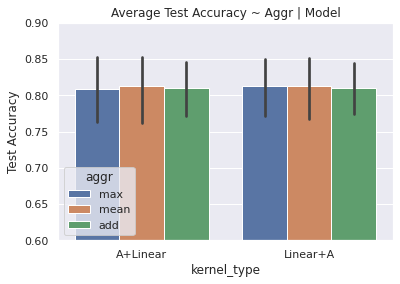

In [9]:
rq3 = df[(df['model'] == 'graphsage') | (df['model'] == 'gcn_nonorm')]
def __map_model(x):
    if x == 'graphsage': return 'A+Linear'
    elif x == 'gcn_nonorm': return 'Linear+A'
rq3['kernel_type'] = rq3['model'].apply(__map_model)
sns.barplot(data=rq3, x='kernel_type', y='best_test_acc', hue='aggr')
plt.ylim(0.6, 0.9)
plt.ylabel('Test Accuracy')
plt.title('Average Test Accuracy ~ Aggr | Model')

Text(0.5, 1.0, 'Average Test Accuracy ~ Aggr | Model')

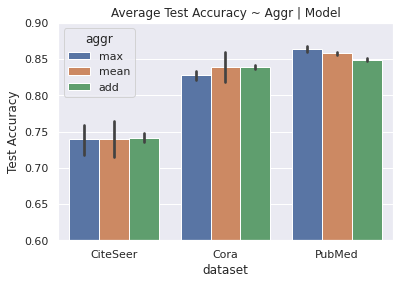

In [10]:
rq3 = df[(df['model'] == 'graphsage') | (df['model'] == 'gcn_nonorm')]
sns.barplot(data=rq3, x='dataset', y='best_test_acc', hue='aggr')
plt.ylim(0.6, 0.9)
plt.ylabel('Test Accuracy')
plt.title('Average Test Accuracy ~ Aggr | Model')

## RQ4: How does the Normalized A affect performance?

In [11]:
rq4 = df[(df['model'] == 'gcn') | (df['model'] == 'gcn_nonorm')]
rq4 = rq4[rq4['conv_layers']==3]

def __map_model(x, y):
    if x == 'gcn':
        return 'Linear+normA+add'
    elif x == 'gcn_nonorm':
        if y == 'mean':
            return 'Linear+A+mean'
        elif y == 'add':
            return 'Linear+A+add'
        elif y == 'max':
            return 'Linear+A+max'

rq4['kernel_type'] = rq4.apply(lambda row: __map_model(row['model'], row['aggr']), axis=1)

Text(0.5, 1.0, 'Average Test Accuracy ~ Kernel Type | Dataset')

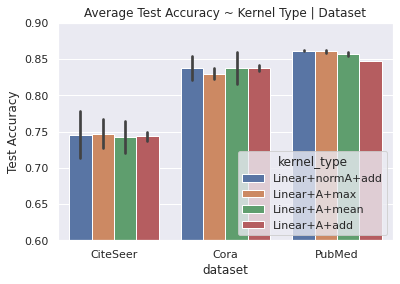

In [12]:
sns.barplot(data=rq4, x='dataset', y='best_test_acc', hue='kernel_type')
plt.ylim(0.6, 0.9)
plt.ylabel('Test Accuracy')
plt.title('Average Test Accuracy ~ Kernel Type | Dataset')

Text(0.5, 1.0, 'Average Test Accuracy ~ Kernel Type')

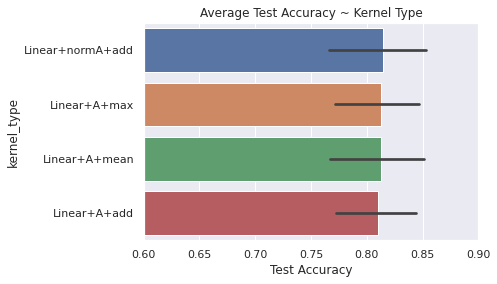

In [13]:
sns.barplot(data=rq4, x='best_test_acc', y='kernel_type')
plt.xlim(0.6, 0.9)
plt.xlabel('Test Accuracy')
plt.title('Average Test Accuracy ~ Kernel Type')

## RQ5: How does the order of Linear and A affect performance?

Text(0.5, 1.0, 'Average Test Accuracy ~ Kernel Type | Dataset')

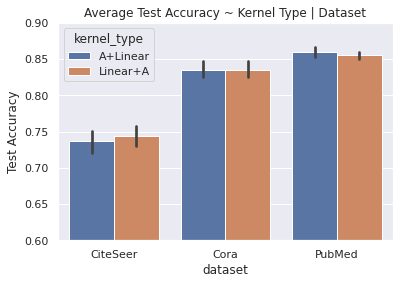

In [14]:
rq5 = df[(df['model'] == 'graphsage') | (df['model'] == 'gcn_nonorm')]
def __map_model(x):
    if x == 'graphsage': return 'A+Linear'
    elif x == 'gcn_nonorm': return 'Linear+A'
rq5['kernel_type'] = rq5['model'].apply(__map_model)
sns.barplot(data=rq5, x='dataset', y='best_test_acc', hue='kernel_type')
plt.ylim(0.6, 0.9)
plt.ylabel('Test Accuracy')
plt.title('Average Test Accuracy ~ Kernel Type | Dataset')

Text(0.5, 1.0, 'Average Test Accuracy ~ Kernel Type | Aggregation')

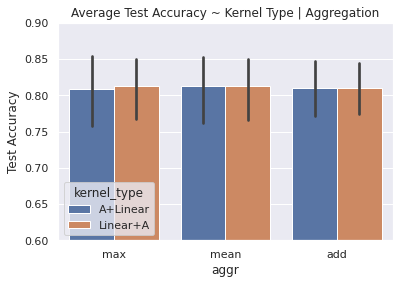

In [15]:
sns.barplot(data=rq5, x='aggr', y='best_test_acc', hue='kernel_type')
plt.ylim(0.6, 0.9)
plt.ylabel('Test Accuracy')
plt.title('Average Test Accuracy ~ Kernel Type | Aggregation')